# In this section we  
 - <font size="5">define the necessary imports for the project</font>
 - <font size="5">import the data into our notebook</font>
 - <font size="5">take a look at the variables present in the dataset</font>

In [783]:
# Import numpy pandas
# Also stats package
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.special import boxcox1p

# Feature engineering requirement
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Other imports
import warnings
warnings.filterwarnings('ignore')

#Show plots within notebook
%matplotlib inline

# Import the training & test datasets 
df_train=pd.read_csv("inputs/train.csv")
df_test=pd.read_csv("inputs/test.csv")

# show the list of columns in them.
df_train.columns

# Show the first 5 columns of each DS
print(df_train.shape)
df_test.shape

(1460, 81)


(1459, 80)

In [784]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [785]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [786]:
# Dropping the 'Id' column from both training & test data
df_train = df_train.drop(columns=['Id'],axis=1)
df_test = df_test.drop(columns=['Id'],axis=1)

<font size=5> __In this section we analyse the target variable 'SalePrice'__</font>

<font size=5>A plot of 'SalePrice' reveals the following:</font>
 - It deviates from the normal distribution
 - It is skewed towards the right (more values towards tail, positive skewness)
 - It shows a prominent peak (kurtosis)

In [787]:
# Describe the statistical properties of SalePrice (target) variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


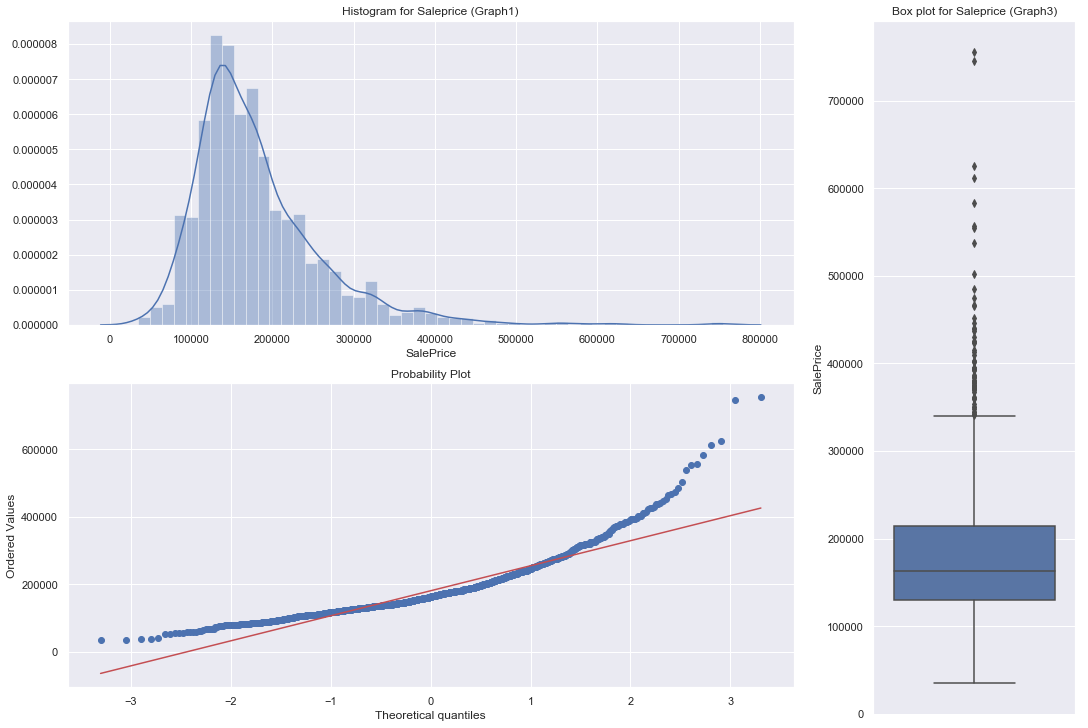

In [788]:
# Plots of SalePrice
# Histogram, Q-Q plot & Box Plot for Saleprice 

saleprice_figure=plt.figure(constrained_layout=True,figsize=(15,10))
saleprice_grid = saleprice_figure.add_gridspec(3,3)

hist_plot=saleprice_figure.add_subplot(saleprice_grid[0,:2])
hist_plot.set_title('Histogram for Saleprice (Graph1)')
sns.distplot(df_train.SalePrice,norm_hist=True, ax = hist_plot)

qq_plot=saleprice_figure.add_subplot(saleprice_grid[1,:2])
qq_plot.set_title('QQ plot for Saleprice (Graph2)')
stats.probplot(df_train['SalePrice'], plot = qq_plot)

box_plot=saleprice_figure.add_subplot(saleprice_grid[:,2])
box_plot.set_title('Box plot for Saleprice (Graph3)')
sns.boxplot(df_train['SalePrice'], ax = box_plot, orient='v')

#skewness and kurtosis describe the histogram
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39825964665415087, 12.024057394918403, 0.9953761551826698))

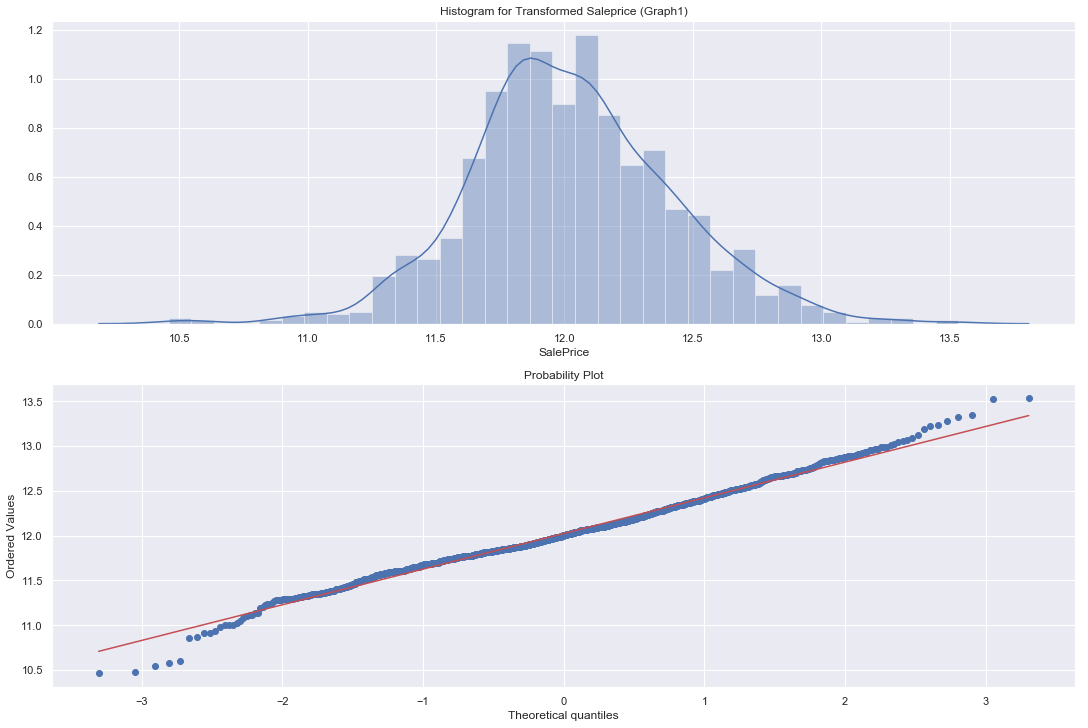

In [789]:
# Transforming the target variable to conform to normal distribution
# Log-transforming the target variable i.e. SalePrice
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

saleprice_xform_figure=plt.figure(constrained_layout=True,figsize=(15,10))
saleprice_xform_grid = saleprice_xform_figure.add_gridspec(2,1)

hist_xform_plot=saleprice_xform_figure.add_subplot(saleprice_xform_grid[0,:])
hist_xform_plot.set_title('Histogram for Transformed Saleprice (Graph1)')
sns.distplot(df_train.SalePrice,norm_hist=True, ax = hist_xform_plot)

qq_xform_plot=saleprice_xform_figure.add_subplot(saleprice_xform_grid[1,:])
qq_xform_plot.set_title('QQ plot for Transformed Saleprice (Graph2)')
stats.probplot(df_train['SalePrice'], plot = qq_xform_plot)

## Investigation of the relationship between target variable & chosen independent variables.
 - The first plot shows relationship between continuous variables & target variable
     - Plot of SalePrice vs GrLivArea shows marked heteroscedasticity,i.e. the target variable shows unequal levels of variance across different predictor (independent) variables. This is usually identified by a funnel-shaped scatter plot.
     - This is usually taken care of by applying tranformations such as log transforms or box cox transforms
     - Plot of SalePrice vs TotalBsmtSF shows that a number of houses do not contain a basement floor
  
  
 - The second plot shows relationship between categorical variables & target variable

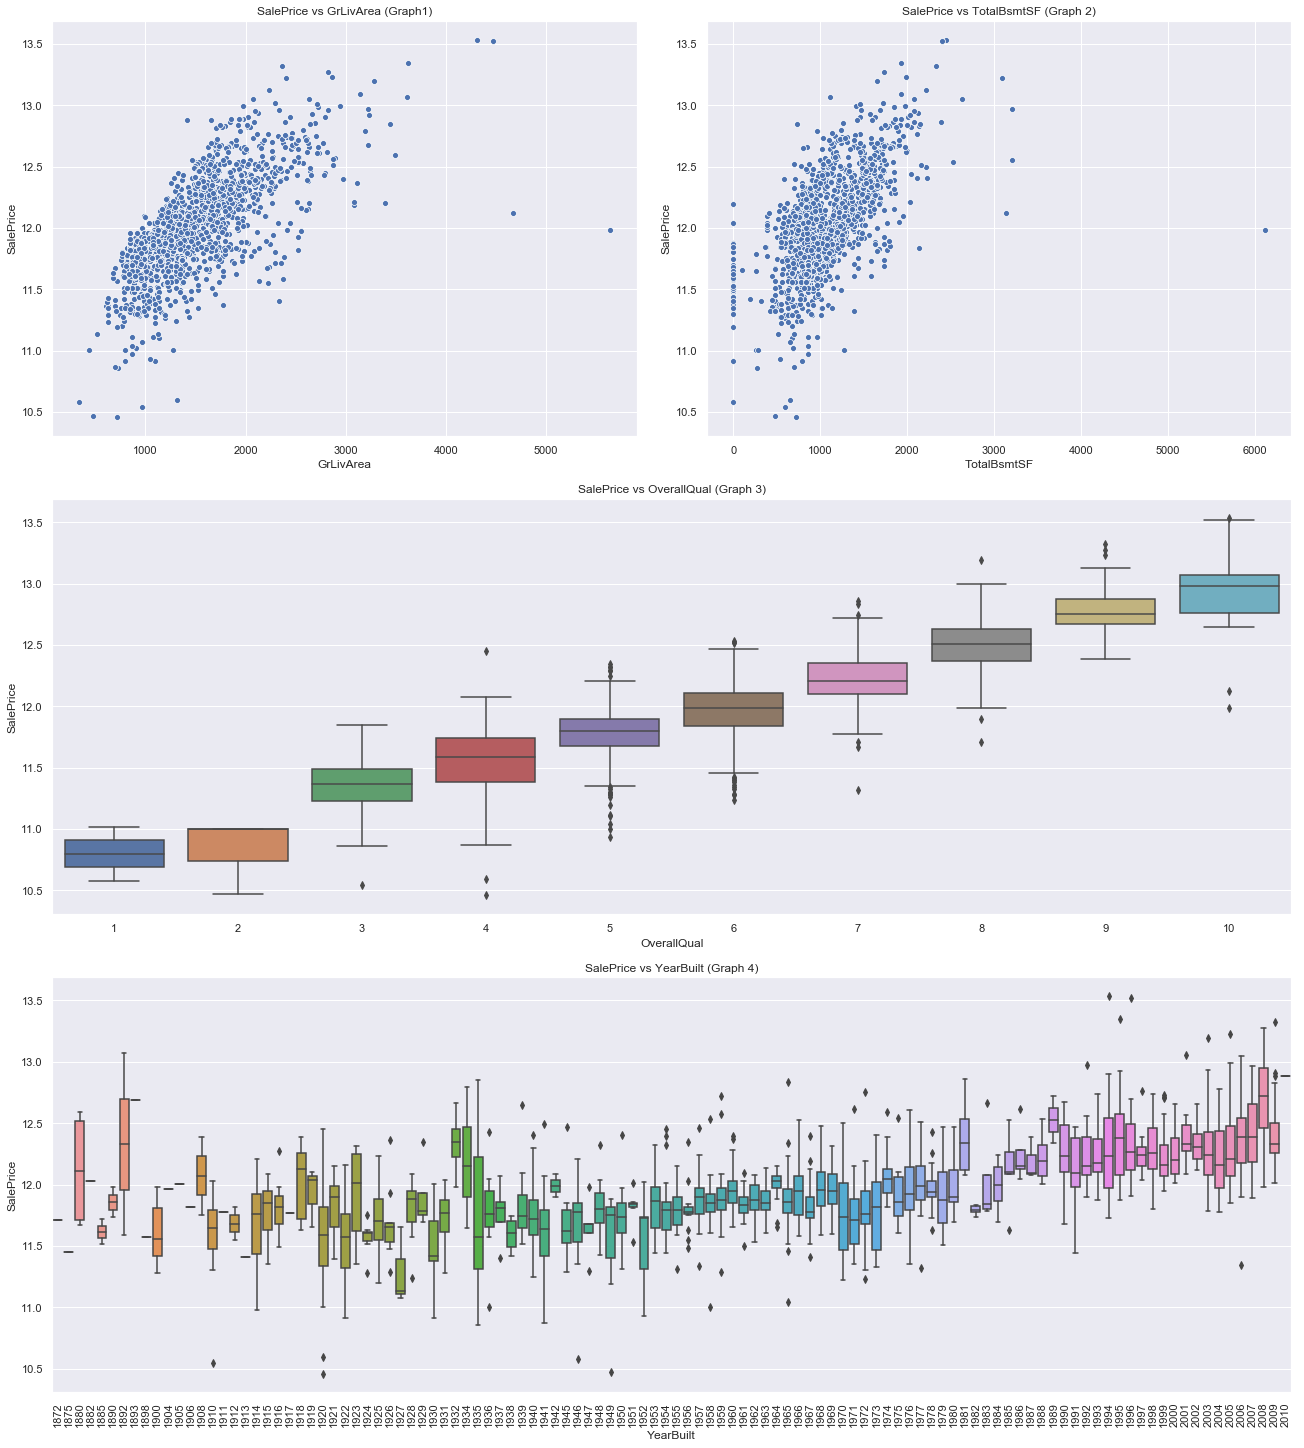

In [790]:
# Scatter plot of SalePrice vs GrLivArea
# var='GrLivArea'
# data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
figure = plt.figure(constrained_layout=True,figsize=(18,20))
grid = figure.add_gridspec(3,2)

# Continuous variables vs target variable
graph1=figure.add_subplot(grid[0,:1])
graph1.set_title('SalePrice vs GrLivArea (Graph1)')
sns.scatterplot(df_train.GrLivArea,df_train.SalePrice,ax=graph1)

graph2=figure.add_subplot(grid[0,1:])
graph2.set_title('SalePrice vs TotalBsmtSF (Graph 2)')
sns.scatterplot(df_train.TotalBsmtSF,df_train.SalePrice,ax=graph2)

# Categorical variables vs target variable
graph3=figure.add_subplot(grid[1,:])
graph3.set_title('SalePrice vs OverallQual (Graph 3)')
sns.boxplot(df_train.OverallQual,df_train.SalePrice,ax = graph3);

graph4=figure.add_subplot(grid[2,:])
graph4.set_title('SalePrice vs YearBuilt (Graph 4)')
boxplot=sns.boxplot(df_train.YearBuilt,df_train.SalePrice,ax = graph4);
_= boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=90)
#type(boxplot)

## Correlation between target variable (SalePrice) & predictor variables.
 - The line calculates the correlation coefficients between each predictor and the target variable
 - Values with null/NA are automatically ignored
 - Negative correlation co-efficient indicates that target and the predictor move in opposite directions
 - Square of the correlation co-efficient (r<sup>2</sup>) represents the degree or extent to which the variance of one variable is related to the variance of the second variable
 - The r<sup>2</sup> here is not to be confused with R<sup>2</sup>, which is an evaluation metric for linear regression machine learning models.

In [791]:
(df_train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.667791
GrLivArea        0.491299
GarageCars       0.463250
GarageArea       0.423655
TotalBsmtSF      0.374708
1stFlrSF         0.356387
FullBath         0.353752
YearBuilt        0.344065
YearRemodAdd     0.319912
GarageYrBlt      0.292760
TotRmsAbvGrd     0.285607
Fireplaces       0.239561
MasVnrArea       0.185596
BsmtFinSF1       0.138401
LotFrontage      0.126650
WoodDeckSF       0.111646
OpenPorchSF      0.103075
2ndFlrSF         0.101953
HalfBath         0.098585
LotArea          0.066214
BsmtFullBath     0.055802
BsmtUnfSF        0.049277
BedroomAbvGr     0.043699
EnclosedPorch    0.022216
KitchenAbvGr     0.021770
ScreenPorch      0.014691
MSSubClass       0.005470
PoolArea         0.004872
MoSold           0.003287
3SsnPorch        0.003014
LowQualFinSF     0.001441
YrSold           0.001389
OverallCond      0.001359
MiscVal          0.000401
BsmtHalfBath     0.000027
BsmtFinSF2       0.000023
Name: SalePrice, dtype: float64

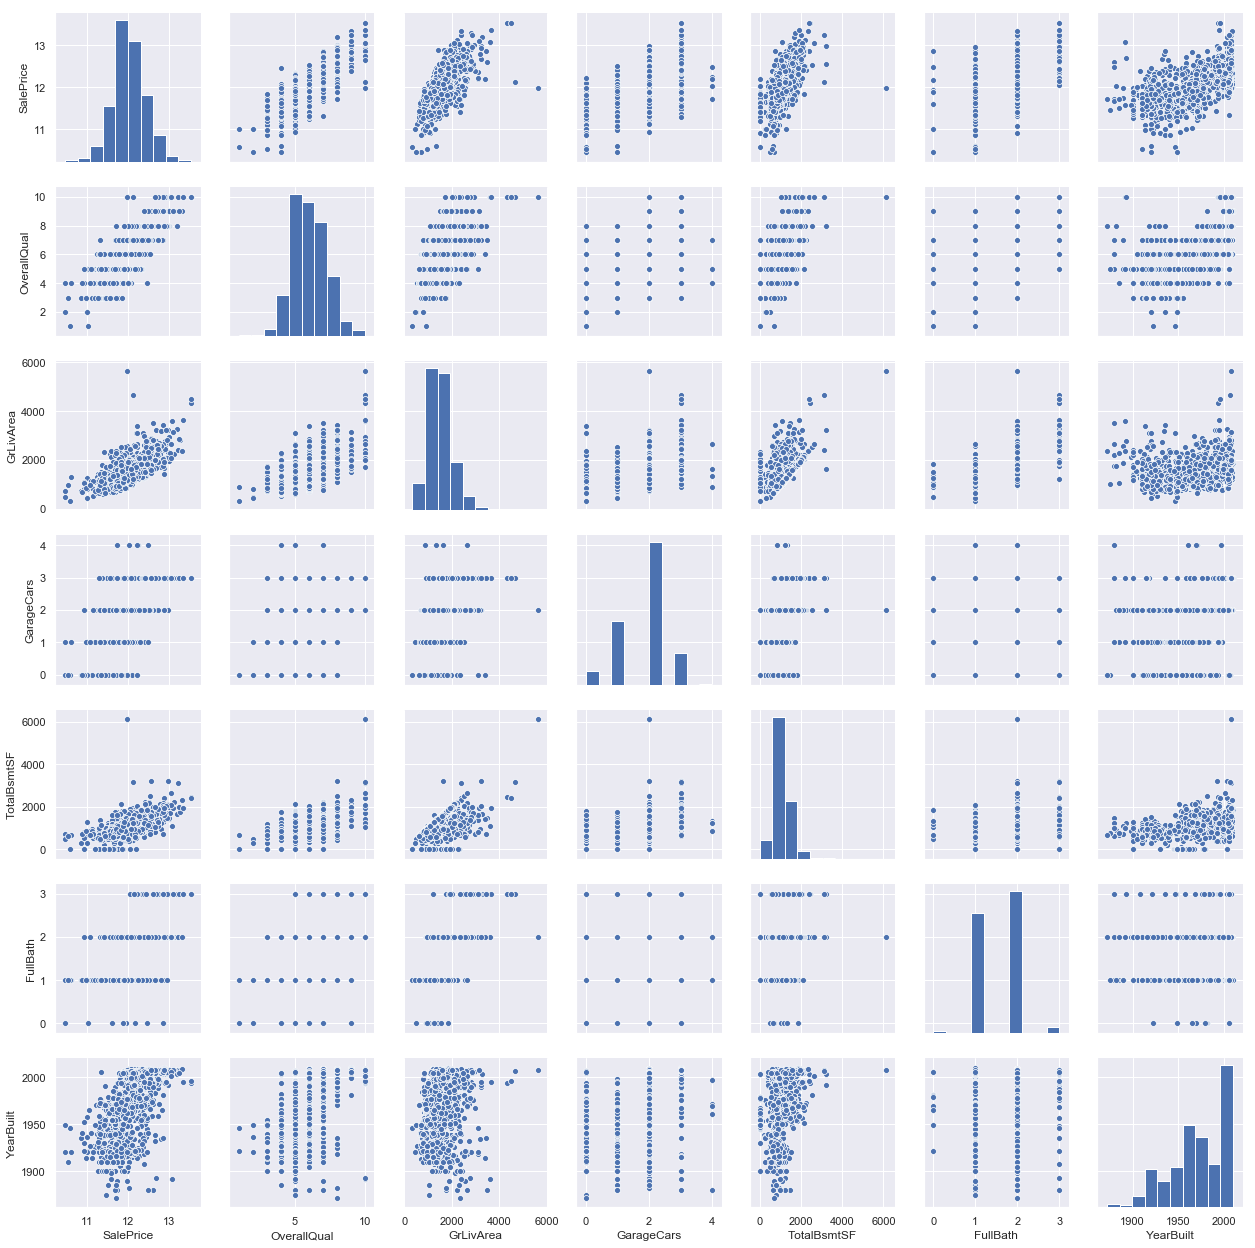

In [792]:
# Visualize the relationship between the top 5 correlated predictor variables & target variable.
# GarageCars and GarageArea variables are closely correlated.
# We choose GarageCars because it's correlation is higher than that of GarageArea
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Dealing with missing values.
 - Missing values have associated with them the following questions:
    - How prevalent are they ?
    - Are they random or is there a discernible pattern ?
 - These questions are important because:
    - Missing data implies a reduction in the dataset
    - We need to be sure that deletion of rows containing missing data does not accidentally remove relevant information.

In [793]:
# function that takes in a dataframe as input & returns a dataframe of two columns
# features containing missing data &
# percentage of missing data in each of them.
def percent_missing_values(df):
    total_missing=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
    percent_missing=(df.isnull().sum().sort_values(ascending = False)/len(df)*100)[(df.isnull().sum().sort_values(ascending=False)/len(df)*100)!=0]
    return pd.concat([total_missing, percent_missing], axis=1, keys=['Total','Percent'])       

In [794]:
missing_values_train=percent_missing_values(df_train)
missing_values_train

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [795]:
missing_values_test=percent_missing_values(df_test)
missing_values_test

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageFinish,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127


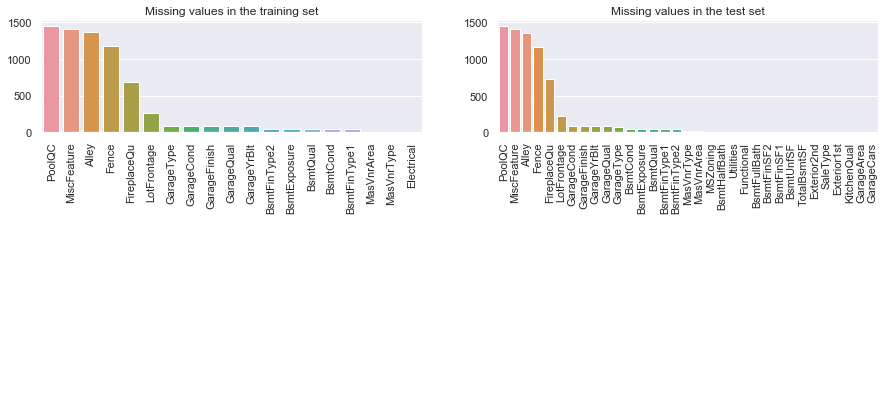

In [796]:
# These plots reveal that missing values are equally distributed in the training & test data
# A common method to handle the missing values needs to be used.
missing_values_figure=plt.figure(constrained_layout=True,figsize=(15,7))
missing_values_grid = missing_values_figure.add_gridspec(1,2)

missing_values_train_graph=missing_values_figure.add_subplot(grid[0,:1])
missing_values_train_graph.set_title('Missing values in the training set')
missing_values_train_plot=sns.barplot(missing_values_train.index,missing_values_train['Total'].values,ax=missing_values_train_graph)
_= missing_values_train_plot.set_xticklabels(missing_values_train_plot.get_xticklabels(),rotation=90)

missing_values_test_graph=missing_values_figure.add_subplot(grid[0,1:])
missing_values_test_graph.set_title('Missing values in the test set')
missing_values_test_plot=sns.barplot(missing_values_test.index,missing_values_test['Total'].values,ax=missing_values_test_graph)
_= missing_values_test_plot.set_xticklabels(missing_values_test_plot.get_xticklabels(),rotation=90)

In [797]:
# The first step in dealing with missing data is to delete columns which have more than a certain percentage of data missing
# The threshold in our dataset will be 30%, i.e if a column has more than 30% of the data missing, we can remove the entire
# column from our training dataframe
df_train=df_train.drop((missing_values_train[missing_values_train['Percent']>30]).index,1)
df_test=df_test.drop((missing_values_test[missing_values_test['Percent']>30]).index,1)

In [798]:
# Next, we will impute the other columns with values for missing data
# For this, first we check which columns have numeric data & which have categorical data
all_data_train=df_train[missing_values_train.index[5:]].columns
numerical_data_train=df_train[missing_values_train.index[5:]]._get_numeric_data().columns
print("Numerical Data: ", numerical_data_train)
categorical_data_train=list(set(all_data_train)-set(numerical_data_train))
print("Categorical Data: ", categorical_data_train)

all_data_test=df_test[missing_values_test.index[5:]].columns
numerical_data_test=df_test[missing_values_test.index[5:]]._get_numeric_data().columns
print("Numerical Data: ", numerical_data_test)
categorical_data_test=list(set(all_data_test)-set(numerical_data_test))
print("Categorical Data: ", categorical_data_test)

Numerical Data:  Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')
Categorical Data:  ['BsmtQual', 'BsmtExposure', 'GarageQual', 'BsmtCond', 'GarageCond', 'BsmtFinType1', 'MasVnrType', 'Electrical', 'GarageType', 'BsmtFinType2', 'GarageFinish']
Numerical Data:  Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'GarageArea', 'GarageCars'],
      dtype='object')
Categorical Data:  ['SaleType', 'GarageType', 'MSZoning', 'BsmtExposure', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Functional', 'GarageQual', 'BsmtCond', 'GarageCond', 'BsmtFinType1', 'BsmtQual', 'KitchenQual', 'BsmtFinType2', 'GarageFinish']


[Text(0.5, 0, 'MasVnrArea')]

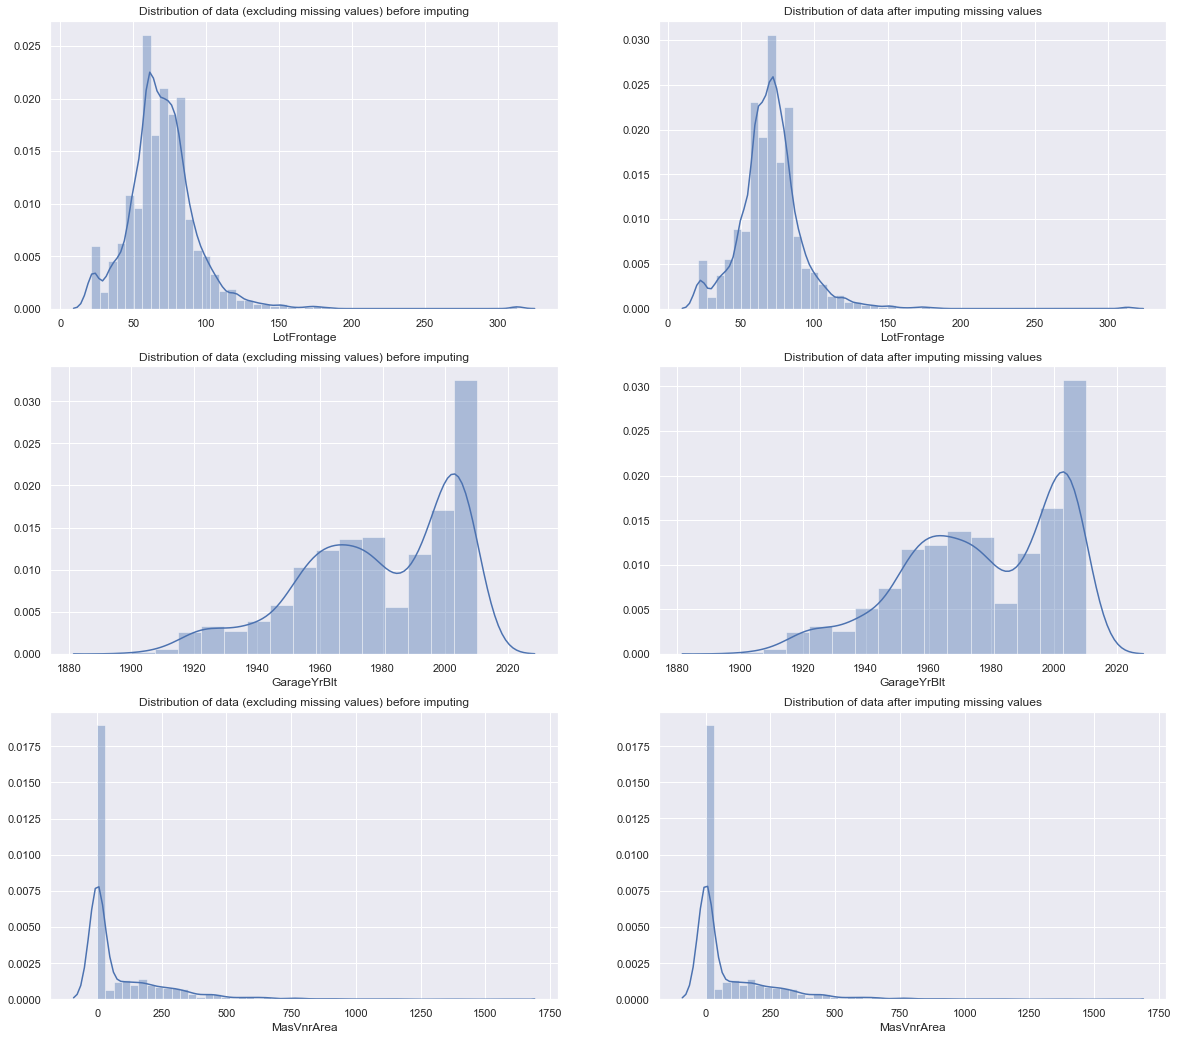

In [799]:
# We will first impute the numerical data
# For this, we should take care that the distribution of the data before & after imputing should be the same
imputing_figure=plt.figure(constrained_layout=True,figsize=(20,18))
imputing_grid = imputing_figure.add_gridspec(3,2)

# LotFrontage
before_imputing_lotfrontage_graph=imputing_figure.add_subplot(grid[0,:1])
before_imputing_lotfrontage_graph.set_title('Distribution of data (excluding missing values) before imputing')
sns.distplot(df_train['LotFrontage'].dropna().values, norm_hist=True, ax = before_imputing_lotfrontage_graph)
before_imputing_lotfrontage_graph.set(xlabel='LotFrontage')

# Impute the missing data with the median of the observations
# Grouping the data by Neighbourhood before applying the transformation leads to better results
df_train['LotFrontage']=df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

after_imputing_lotfrontage_graph=imputing_figure.add_subplot(grid[0,1:])
after_imputing_lotfrontage_graph.set_title('Distribution of data after imputing missing values')
sns.distplot(df_train['LotFrontage'].values, ax = after_imputing_lotfrontage_graph)
after_imputing_lotfrontage_graph.set(xlabel='LotFrontage')

# GarageYrBlt
before_imputing_garageyrblt_graph=imputing_figure.add_subplot(grid[1,:1])
before_imputing_garageyrblt_graph.set_title('Distribution of data (excluding missing values) before imputing')
sns.distplot(df_train['GarageYrBlt'].dropna().values, norm_hist=True, ax = before_imputing_garageyrblt_graph)
before_imputing_garageyrblt_graph.set(xlabel='GarageYrBlt')

df_train['GarageYrBlt']=df_train.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))

after_imputing_garageyrblt_graph=imputing_figure.add_subplot(grid[1,1:])
after_imputing_garageyrblt_graph.set_title('Distribution of data after imputing missing values')
sns.distplot(df_train['GarageYrBlt'].values, ax = after_imputing_garageyrblt_graph)
after_imputing_garageyrblt_graph.set(xlabel='GarageYrBlt')

# MasVnrArea
before_imputing_masvnrarea_graph=imputing_figure.add_subplot(grid[2,:1])
before_imputing_masvnrarea_graph.set_title('Distribution of data (excluding missing values) before imputing')
sns.distplot(df_train['MasVnrArea'].dropna().values, norm_hist=True, ax = before_imputing_masvnrarea_graph)
before_imputing_masvnrarea_graph.set(xlabel='MasVnrArea')

df_train['MasVnrArea']=df_train.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

after_imputing_masvnrarea_graph=imputing_figure.add_subplot(grid[2,1:])
after_imputing_masvnrarea_graph.set_title('Distribution of data after imputing missing values')
sns.distplot(df_train['MasVnrArea'].values, ax = after_imputing_masvnrarea_graph)
after_imputing_masvnrarea_graph.set(xlabel='MasVnrArea')

In [800]:
# Impute test data numerical values
for column in numerical_data_test:
    df_test[column]=df_test.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.median()))

In [801]:
# Impute missing values in categorical data
# Usually missing data in categorical columns is filled using the mode of the observations
# Here also it makes sense to group the data by neighbourhood first.

for column in categorical_data_train:
    df_train[column]=df_train.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.mode().iloc[0]))
    
for column in categorical_data_test:    
    df_test[column]=df_test.groupby('Neighborhood')[column].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [802]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())
#df_test.isna().sum().sum()
#current_missing_values_test=percent_missing_values(df_test)
#current_missing_values_test
#df_test['BsmtFullBath'][df_test['BsmtFullBath'].isna()==True]

0
0


## Transforming skewed predictor variables to conform to normal distribution

In [803]:
numerical_features_train=df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of training set numerical features
numerical_features_train_skewed = df_train[numerical_features_train].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_train = pd.DataFrame({'Skew_Train' :numerical_features_train_skewed})

numerical_features_test=df_test.dtypes[df_test.dtypes != "object"].index

# Check the skew of test set numerical features
numerical_features_test_skewed = df_train[numerical_features_test].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_test = pd.DataFrame({'Skew_Test' :numerical_features_test_skewed})

In [804]:
print("There are {} skewed training set numerical features to Box Cox transform".format(skewness_train.shape[0]))
print("There are {} skewed test set numerical features to Box Cox transform".format(skewness_test.shape[0]))

There are 37 skewed training set numerical features to Box Cox transform
There are 36 skewed test set numerical features to Box Cox transform


In [805]:
skewed_features_train = skewness_train.index
skewed_features_test = skewness_test.index
lam = 0.15

for feature in skewed_features_train:
    #all_data[feat] += 1
    df_train[feature] = boxcox1p(df_train[feature], lam)

for feature in skewed_features_test:
    #all_data[feat] += 1
    df_test[feature] = boxcox1p(df_test[feature], lam)    

## Correlation heatmap to find the correlation between variables and check if there is multicollinearity in the dataset

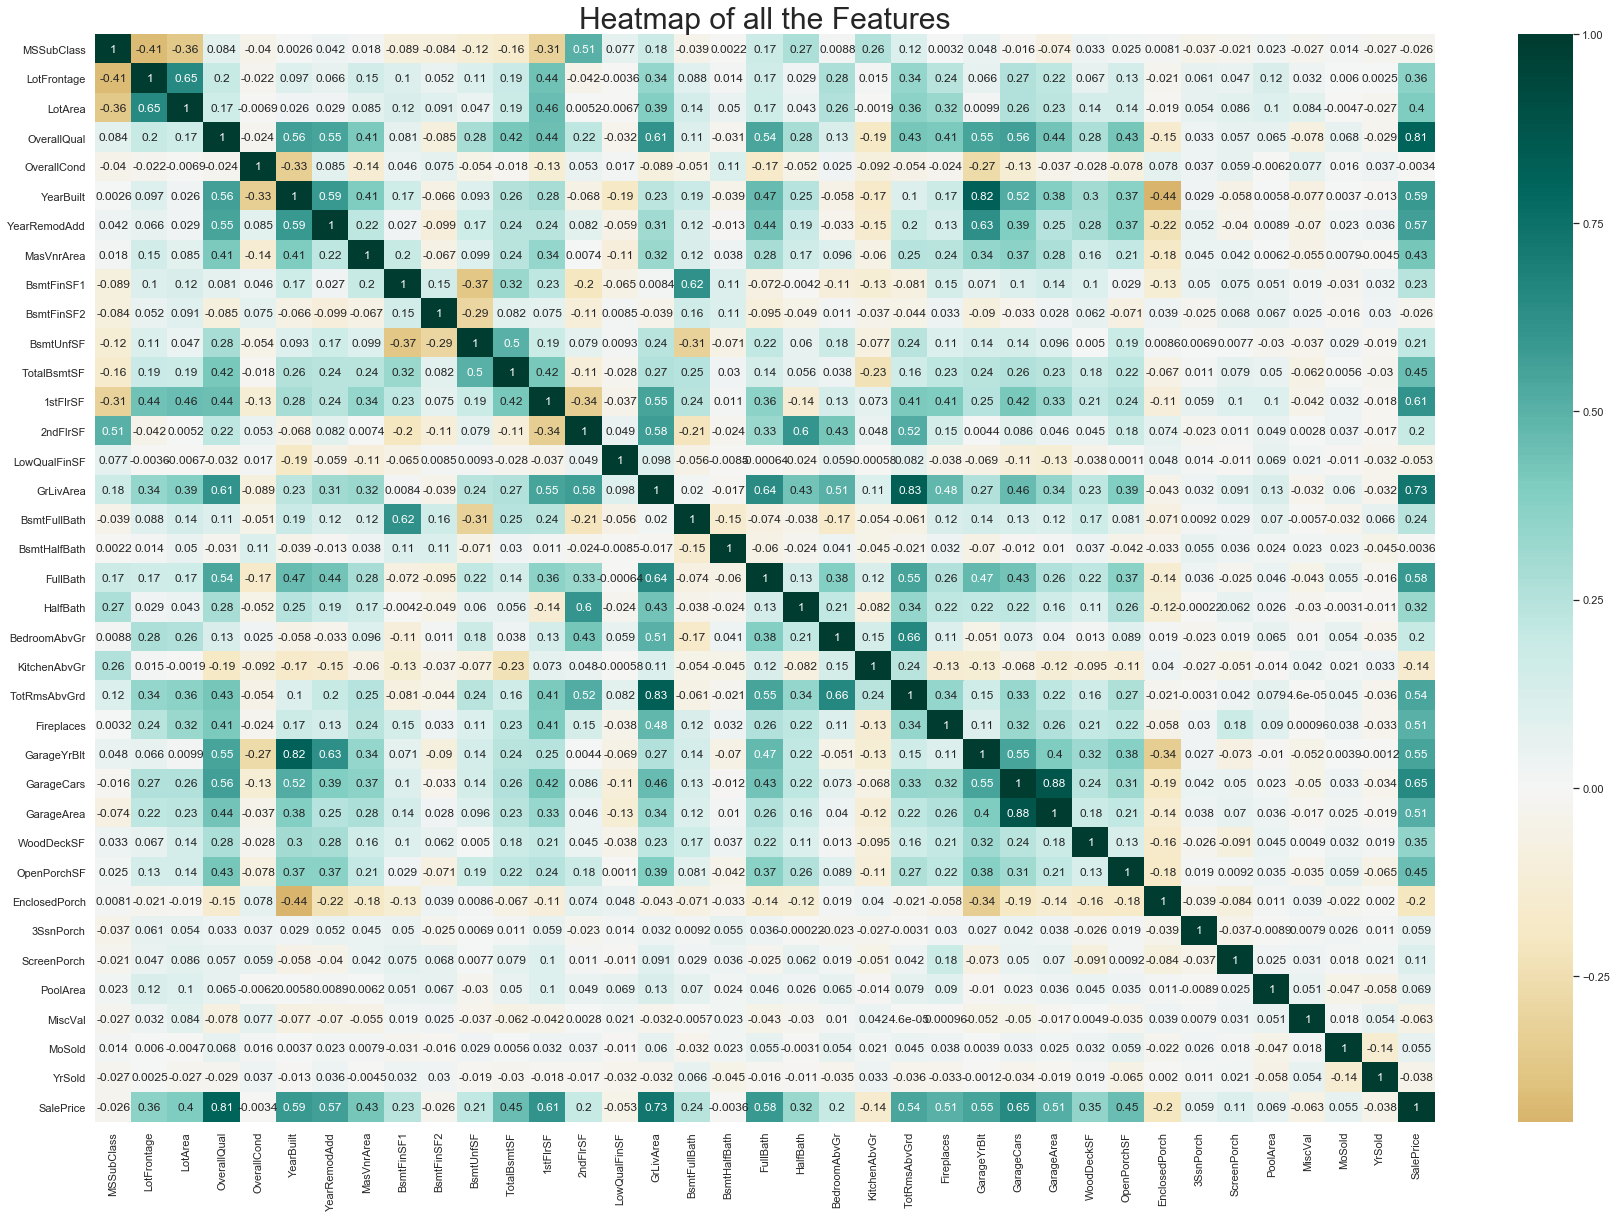

In [806]:
plt.subplots(figsize = (30,20))
## Plotting heatmap. 
sns.heatmap(df_train.corr(), cmap="BrBG", annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [807]:
# We will choose features which have more than 0.15 as the correlation co-efficient & form a new dataset
df_train_corr=df_train.corr().sort_values(by=["SalePrice"],ascending=False).iloc[0].sort_values(ascending=False)

index=[]
Train=pd.DataFrame()
df_train_sp=df_train['SalePrice']
for i in range(0,len(df_train_corr)):
    if df_train_corr[i] > 0.15 and df_train_corr.index[i]!='SalePrice':
        index.append(df_train_corr.index[i])

df_train_new=df_train[index]   
df_train_new.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt',
       'FullBath', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea',
       'Fireplaces', 'OpenPorchSF', 'TotalBsmtSF', 'MasVnrArea', 'LotArea',
       'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFullBath', 'BsmtFinSF1',
       'BsmtUnfSF', 'BedroomAbvGr', '2ndFlrSF'],
      dtype='object')

In [808]:
# Now we will combine features that are closely correlated to form new columns
df_train_new['OverallQualCond'] = (df_train['OverallCond'] * df_train['OverallQual']) / 100.0
df_train_new['HouseAgeWhenSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train_new['GarageAgeWhenSold'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train_new['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF'] 
df_train_new['TotalPorchArea'] = df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_train_new['TotalBathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

df_test['OverallQualCond'] = (df_test['OverallCond'] * df_test['OverallQual']) / 100.0
df_test['HouseAgeWhenSold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['GarageAgeWhenSold'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF'] 
df_test['TotalPorchArea'] = df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']
df_test['TotalBathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))

In [809]:
# Now we will include the new columns in the new dataset
original_cols=['OverallCond','OverallQual','YrSold','YearBuilt','YrSold','GarageYrBlt','TotalBsmtSF','1stFlrSF','2ndFlrSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']
final_cols=[]
for i in df_train_new.columns:
    if i not in original_cols and i!='SalePrice':
        final_cols.append(i)
df_train_new=df_train_new[final_cols]
df_train_new.columns

Index(['GrLivArea', 'GarageCars', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageArea',
       'Fireplaces', 'MasVnrArea', 'LotArea', 'LotFrontage', 'BsmtUnfSF',
       'BedroomAbvGr', 'OverallQualCond', 'HouseAgeWhenSold',
       'GarageAgeWhenSold', 'TotalSF', 'TotalPorchArea', 'TotalBathrooms'],
      dtype='object')

In [810]:
# Check if newly formed features have any missing data
print(df_train_new.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


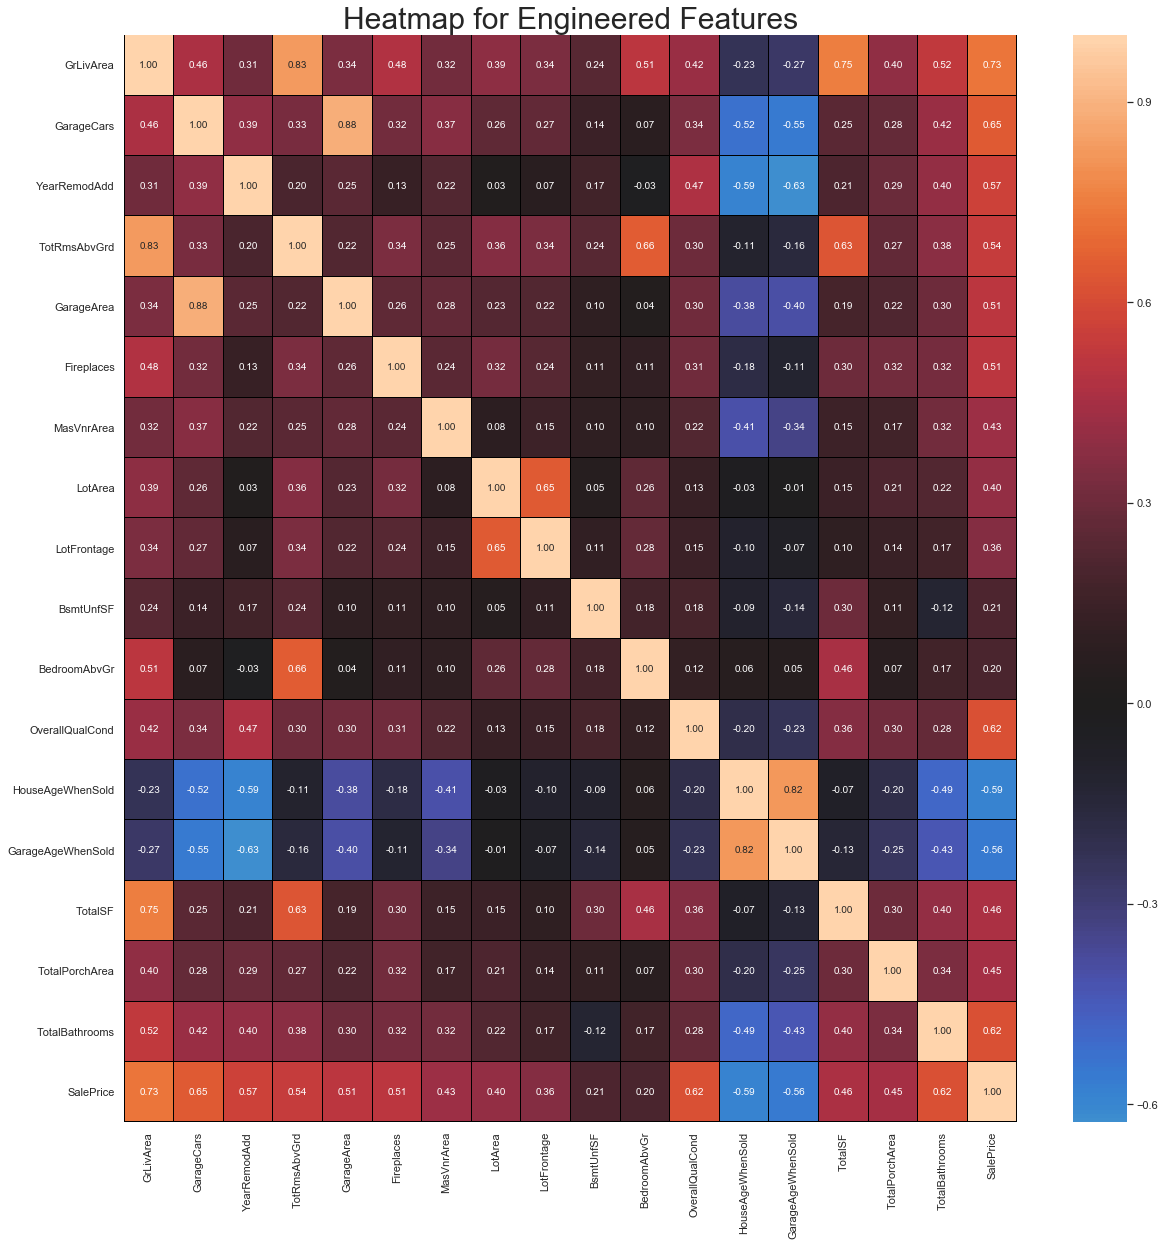

In [811]:
# Re-plot correlation heatmap using newly created training dataset
df_train_new['SalePrice']=df_train_sp
plt.subplots(figsize = (20,20))
## Plotting heatmap. 
sns.heatmap(df_train_new.corr(), annot=True, center = 0,linewidth= 0.02,linecolor='black',fmt='.2f',annot_kws={'size': 10});
## Give title. 
plt.title("Heatmap for Engineered Features", fontsize = 30);

## One-Hot Encoding categorical data columns
 - One Hot Encoding is a method to convert categorical (text) data into numeric data.
 - This is a requirement since text data cannot be input into any model
 - One-Hot encoding is a method of converting text data into numeric data.
 - The advantage of One-Hot encoding is that there is no danger of the model misinterpreting encoded data to think that there is some kind of hierarchy to it, when none exists.
 - The procedure for One-Hot encoding is as follows:
    - Label encode the required column to One-hot encode
    - Split the column into multiple columns consisting of 0s & 1s
    - The value of the column determines whether the value in the split columns is 1 or 0

In [812]:
# Add all the categorical data columns to df_train_new
final_cols=[]
for i in df_train_new.columns:
    if i not in original_cols and i!='SalePrice':
        final_cols.append(i)
df_train_new=df_train_new[final_cols]

all_all_data_train=df_train.columns
all_numerical_data_train=df_train._get_numeric_data().columns
all_categorical_data_train=list(set(all_all_data_train)-set(all_numerical_data_train))

df_train_cat=df_train[all_categorical_data_train]

df_train_new=pd.concat([df_train_new,df_train_cat],axis=1)
df_train_new.head()

,GrLivArea,GarageCars,YearRemodAdd,TotRmsAbvGrd,GarageArea,Fireplaces,MasVnrArea,LotArea,LotFrontage,BsmtUnfSF,...,BsmtFinType1,Electrical,HouseStyle,KitchenQual,BsmtFinType2,GarageFinish,MSZoning,GarageCond,Foundation,GarageType
0,13.698888,1.194318,14.187527,2.602594,10.506271,0.000000,8.059126,19.212182,5.831328,7.483296,...,GLQ,SBrkr,2Story,Gd,Unf,RFn,RL,TA,PConc,Attchd
1,12.792276,1.194318,14.145138,2.259674,10.062098,0.730463,0.000000,19.712205,6.221214,8.897844,...,ALQ,SBrkr,1Story,TA,Unf,RFn,RL,TA,CBlock,Attchd
2,13.832085,1.194318,14.185966,2.259674,10.775536,0.730463,7.646538,20.347241,5.914940,9.917060,...,GLQ,SBrkr,2Story,Gd,Unf,RFn,RL,TA,PConc,Attchd
3,13.711364,1.540963,14.135652,2.440268,10.918253,0.730463,0.000000,19.691553,5.684507,10.468500,...,ALQ,SBrkr,2Story,Gd,Unf,Unf,RL,TA,BrkTil,Detchd
4,14.480029,1.540963,14.182841,2.750250,11.627708,0.730463,9.391827,21.325160,6.314735,10.221051,...,GLQ,SBrkr,2Story,Gd,Unf,RFn,RL,TA,PConc,Attchd


In [813]:
def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

In [817]:
#df_train_new=PerformOneHotEncoding(df_train_new,all_categorical_data_train)
df_train_new.shape
#df_test=PerformOneHotEncoding(df_test,categorical_data_test)

(1460, 251)

## Use df_train_new(predictor dataset) & df_train_sp(predicted variable) to perform model fitting on training data

In [815]:
#df_train_new.shape